In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os, sys

In [3]:
sys.path.append('..')

In [4]:
from ers.base import ERS
from ers.models import StoVol

In [5]:
T = 25
alpha=0.95
beta=0.7
sv=0.3
d=1

stovol = StoVol(dimension=d, alpha=alpha, beta=beta, sv=sv)

In [6]:
xtrue=np.zeros((T, d));
xtrue[0,:]=stovol.ss*np.random.randn(d)

y=np.zeros((T, d))
y[0]=beta*np.exp(xtrue[0,0]/2)*np.random.randn(d);
for t in np.arange(1,T):
    xtrue[t]=alpha*xtrue[t-1]+sv*np.random.randn(d)
    y[t]=beta*np.exp(xtrue[t]/2)*np.random.randn(d)

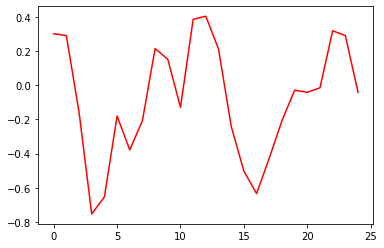

In [7]:
plt.plot(xtrue, color = 'red')

In [8]:
n_samples = 2
accepted_x, cand_x, n_trial = stovol.sample_n(n_samples=n_samples, n_particles=2500, T=T, y=y)

100%|██████████| 2/2 [00:14<00:00,  7.24s/it]


In [9]:
n_samples/ n_trial

1.0

In [10]:
average_x = np.mean(accepted_x, axis=0)

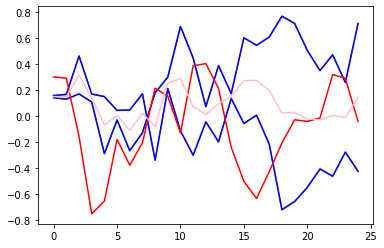

In [11]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')

In [12]:
 from pathos.multiprocessing import ProcessingPool as Pool

In [13]:

import time

In [14]:
start = time.time()
num_workers = 3
n_samples = 100
n_particles = 2000
f = lambda x : stovol.sample_n(n_samples=n_samples, n_particles=n_particles, T=T, y=y)
with Pool(num_workers) as p:
        out = p.map(f, range(num_workers))
time.time()-start

100%|██████████| 100/100 [23:36<00:00, 14.16s/it]


1416.4562528133392

In [15]:
accepted_x = np.concatenate([out[i][0] for i in range(num_workers)])
cand_x = np.concatenate([out[i][1] for i in range(num_workers)])
average_x = np.mean(accepted_x, axis=0)

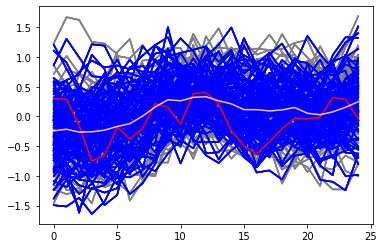

In [16]:
for i in range(cand_x.shape[0]):
    plt.plot(cand_x[i,:,0], color = 'gray')
    
for i in range(accepted_x.shape[0]):
    plt.plot(accepted_x[i,:,0], color = 'blue')

plt.plot(xtrue, color = 'red')
plt.plot(average_x, color = 'pink')

In [17]:
def gen_y(x):
    T = np.shape(x)[0]
    d = np.shape(x)[1]
    
    y=np.zeros((T, d))
    y[0]=beta*np.exp(xtrue[0,0]/2)*np.random.randn(d);
    for t in np.arange(1,T):
        y[t]=beta*np.exp(x[t]/2)*np.random.randn(d)
    return y

def gen_ave_y(x, n=100):
    ys = np.array([gen_y(x) for _ in range(n)])
    return ys
        

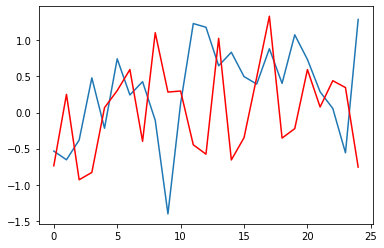

In [18]:
plt.plot(y)
plt.plot(gen_y(xtrue), color='red')

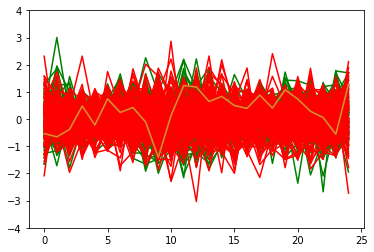

In [19]:

plt.ylim(-4,4)


ys = gen_ave_y(xtrue, 100)
for y_i in ys:
    plt.plot(y_i, color='green')
    
ys = gen_ave_y(average_x, 100)
for y_i in ys:
    plt.plot(y_i, color='red')
plt.plot(y)


plt.plot(y)

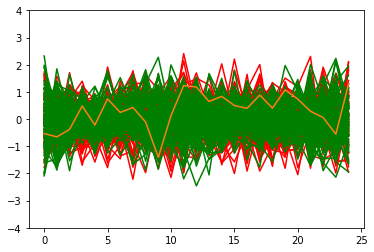

In [20]:

plt.ylim(-4,4)


    
ys = gen_ave_y(average_x, 100)
for y_i in ys:
    plt.plot(y_i, color='red')
plt.plot(y)


ys = gen_ave_y(xtrue, 100)
for y_i in ys:
    plt.plot(y_i, color='green')
    
plt.plot(y)